In [2]:
%matplotlib inline
import os
import glob
import mne
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data_path = "/Users/jananjahed/Desktop/Bachelor's project/ds005873"
ecg_pattern = os.path.join(data_path, "**", "ecg", "*.edf")

all_ecg_files = glob.glob(ecg_pattern, recursive=True)
print(f"Found {len(all_ecg_files)} ECG EDF files total.")

Found 2807 ECG EDF files total.


Using example file for ECG visualization: /Users/jananjahed/Desktop/Bachelor's project/ds005873/sub-021/ses-01/ecg/sub-021_ses-01_task-szMonitoring_run-03_ecg.edf
Extracting EDF parameters from /Users/jananjahed/Desktop/Bachelor's project/ds005873/sub-021/ses-01/ecg/sub-021_ses-01_task-szMonitoring_run-03_ecg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2582527  =      0.000 ... 10087.996 secs...

Raw ECG Info:
<Info | 8 non-empty values
 bads: []
 ch_names: ECG SD
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 nchan: 1
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: x, sex: 2, last_name: x>
>
Using matplotlib as 2D backend.


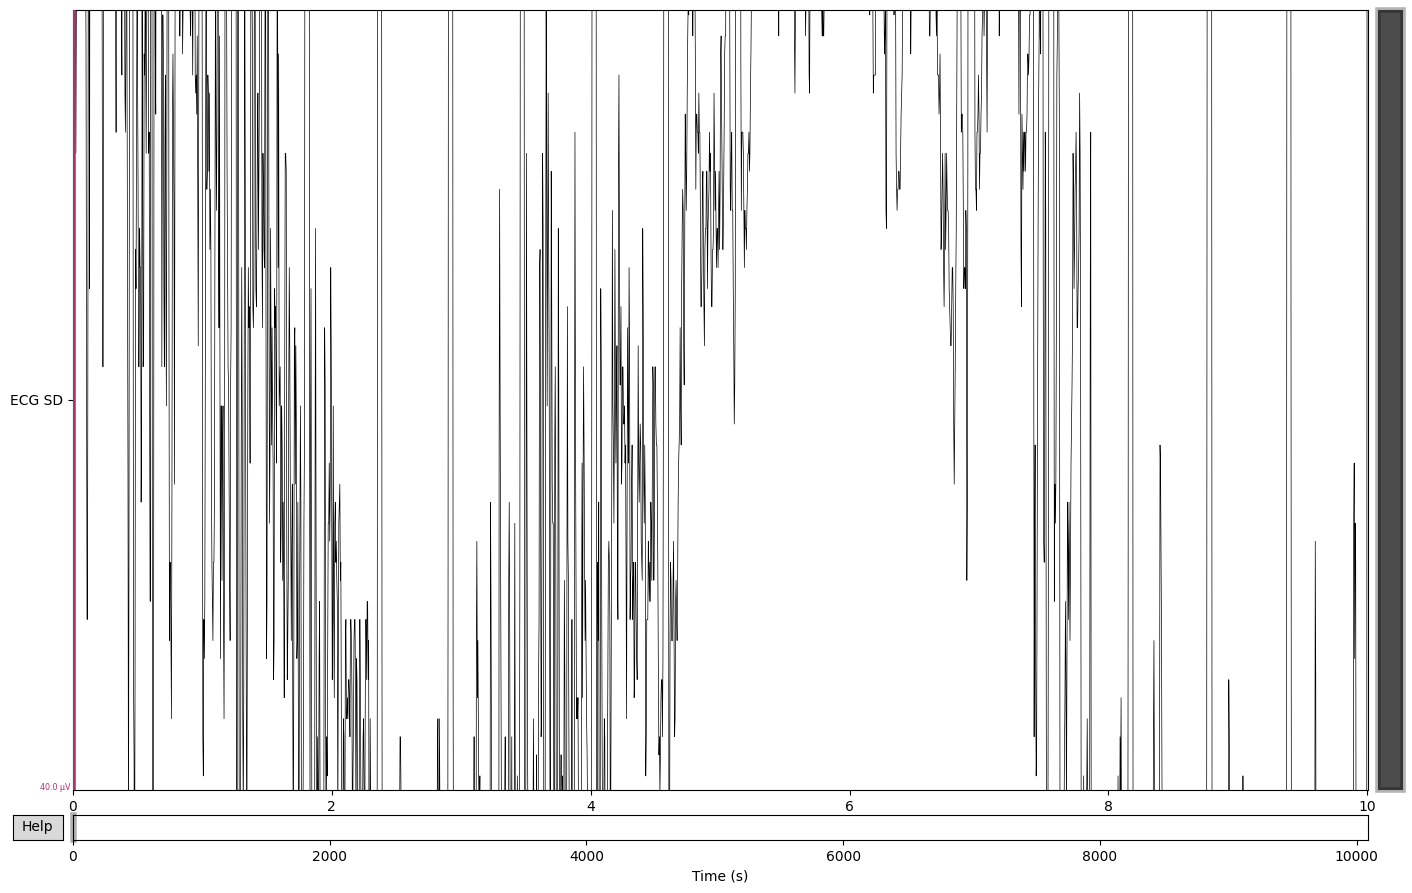

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


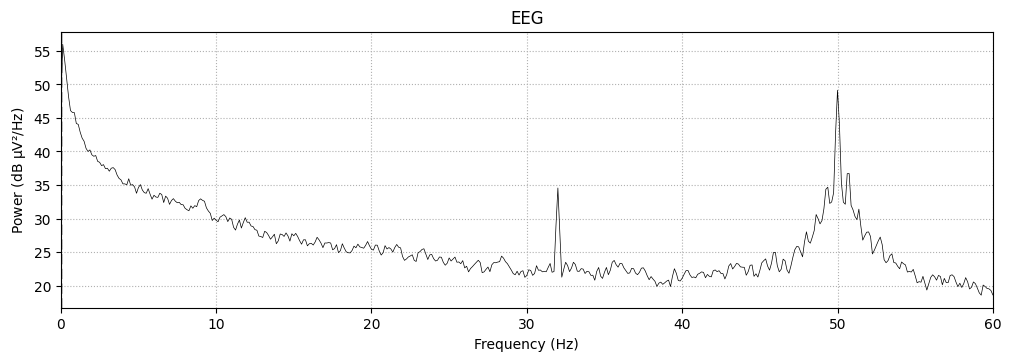

In [ ]:
if len(all_ecg_files) == 0:
    print("No ECG EDF files found. Please check your directory paths.")
else:
    example_ecg_file = all_ecg_files[0]
    print("Using example file for ECG visualization:", example_ecg_file)

    raw_ecg = mne.io.read_raw_edf(example_ecg_file, preload=True)
    print("\nRaw ECG Info:")
    print(raw_ecg.info)
    
    #raw ECG time series
    raw_ecg.plot(title='Raw ECG Data', show=True, block=True)
    
    #Power Spectral Density (PSD) of the raw data
    raw_ecg.plot_psd(fmax=60, average=True, picks='all')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband e

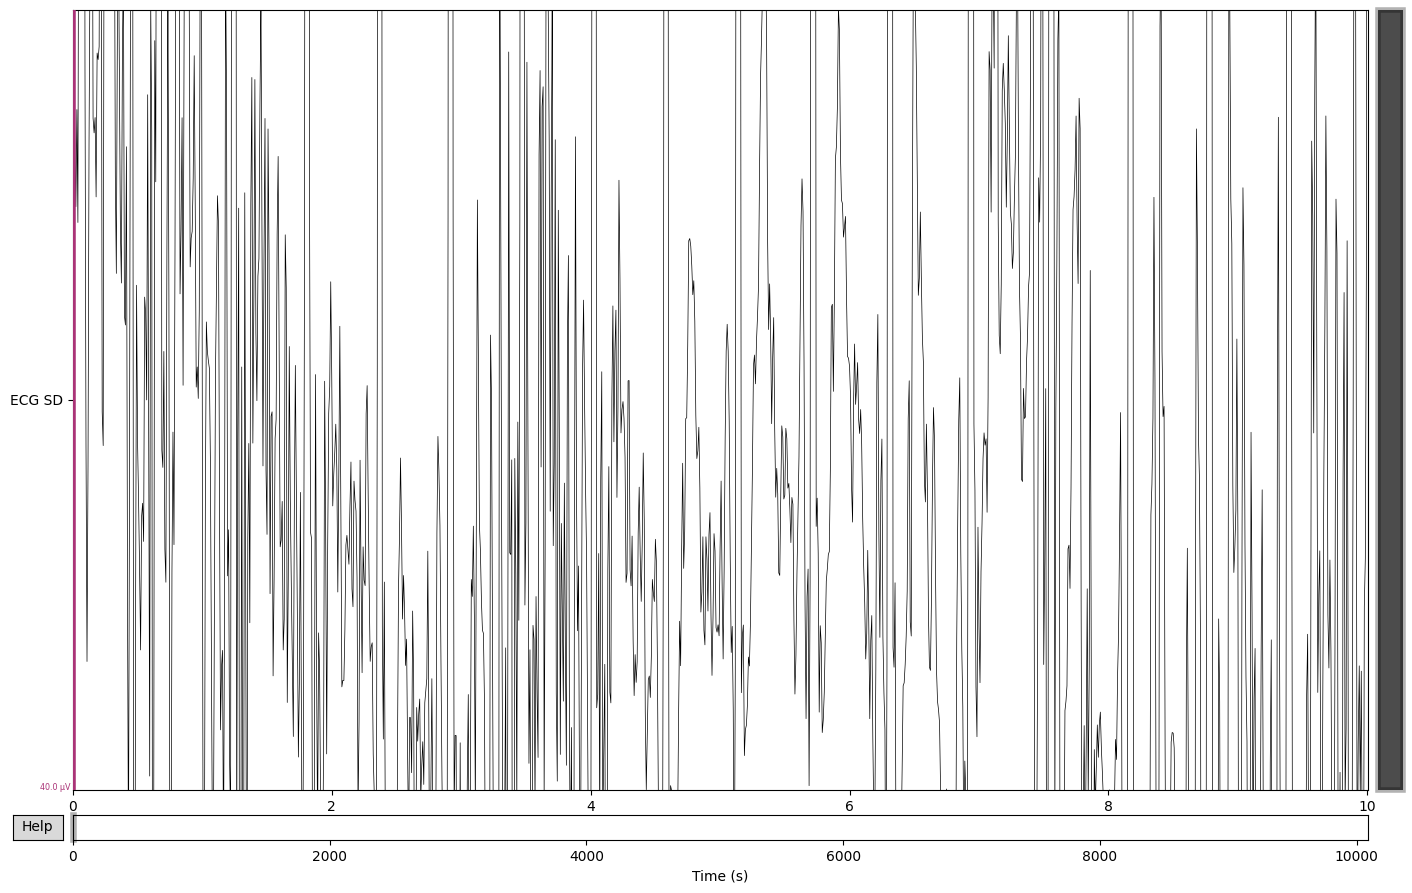

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


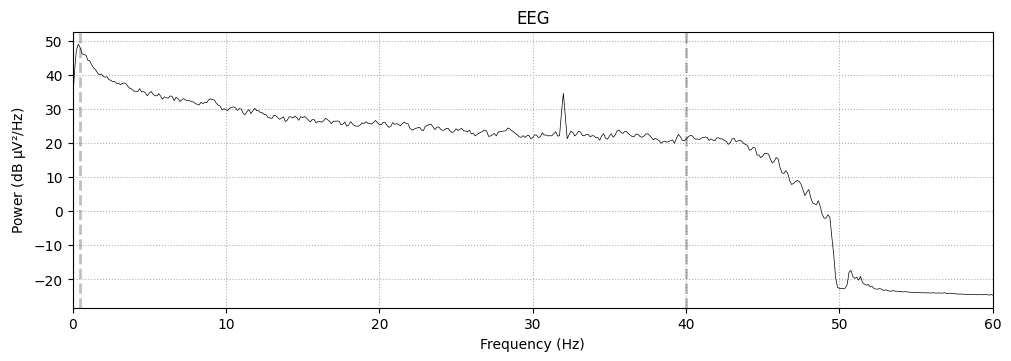

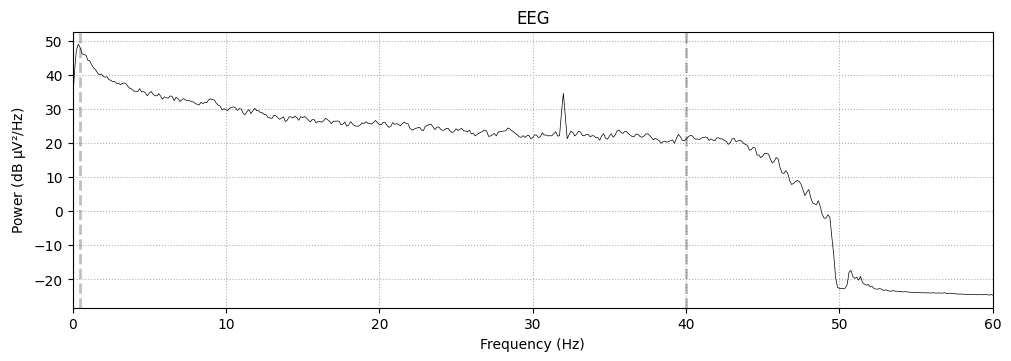

In [ ]:
# filter the ECG Data
raw_ecg_filtered = raw_ecg.copy()
raw_ecg_filtered.filter(l_freq=0.5, h_freq=40, method='fir', fir_window='hamming')
    
# apply a notch filter at 50 Hz
raw_ecg_filtered.notch_filter(freqs=[50])
    
raw_ecg_filtered.plot(title='Filtered ECG Data', show=True, block=True)
raw_ecg_filtered.plot_psd(fmax=60, average=True, picks='all')